# Creditcard Defaulter Prediction

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import warnings

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


warnings.filterwarnings("ignore")
%matplotlib inline

## Read Data

In [3]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


## Understand the data

* This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan **from April 2005 to September 2005**.
* Every transaction value is in New Taiwan(NT) Dollars

### What column name conveys-

* ID - Id of each client
* LIMIT_BAL - Amount of given credit in NT dollars(includes individual and family/supplementary credit)
* SEX - 
* * 1 - male
* * 2 - female
* EDUCATION -
* * 1 - Graduate school
* * 2 - University
* * 3 - High school
* * 4 - others
* * 5 - Unknown
* MARRIAGE - Martial status
* * 1 - Married
* * 2 - single
* * 3 - Others
* AGE - Age in years
* PAY_0 - September repayment status
* * -2 - No consumption
* * -1 - pay duly
* * 0 - Use of revolving credit
* * 1 - payment delay one month
* * 2 - payment delay for two months
* * 3 - payment delay for three months
* * 8 - payment delay for eight months
* * 9 - payment delay for nine months or above
* PAY_2 - August repayment status(same code)
* PAY_3 - July repayment status(same code)
* PAY_4 - June repayment status(same code)
* PAY_5 - May repayment status(same code)
* PAY 6 - April repayment status(same code)
* BILL_AMT1 - September Bill statement
* BILL_AMT2 - August Bill Statement
* BILL_AMT3 - July Bill Statement
* BILL_AMT4 - June Bill Statement
* BILL_AMT5 - May Bill Statement
* BIll_AMT6 - April Bill Statement
* PAY_AMT1 - Amount of previous payment in September
* PAY_AMT2 - Amount of previous payment in August
* PAY_AMT3 - ""     ""  ""      ""       "" July
* PAY_AMT4 - ""     ""  ""      ""       "" June
* PAY_AMT5 - ""     ""  ""      ""       "" May
* PAY_AMT6 - ""     ""  ""      ""       "" April
* default.payment.next.month - Default payment
* * 1 - yes
* * 0 - No

In [4]:
# checking rows and columns for the dataset
df.shape

(30000, 25)

In [5]:
# columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

### Observations :-
- Here "ID" feature is not required for our analysis,so remove "ID" column

In [6]:
# dropping "ID" column
df.drop("ID",axis = 1,inplace = True)

In [7]:
# DataFrame after removing one column
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [8]:
# Describing the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [9]:
# defining numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# Printing numerical and categorical features
print("We have {} Numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} Categorical features : {}".format(len(categorical_features),categorical_features))

We have 24 Numerical features : ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
We have 0 Categorical features : []


### Observations :-
- Here we have all 24 numerical columns
- We no need to label encode features

## Checking missing values :-

In [10]:
# checking null values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

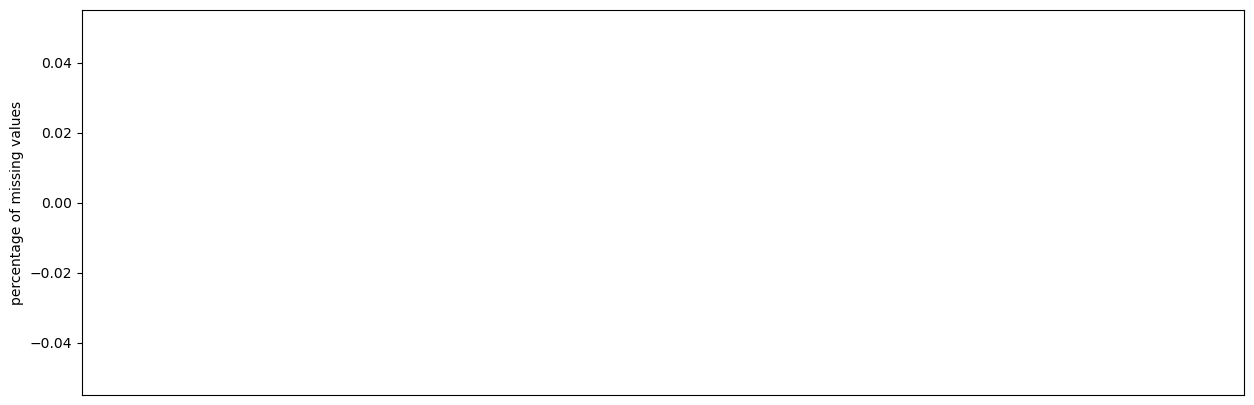

In [11]:
# Plotting missing values count for each column

fig,ax = plt.subplots(figsize=(15,5))
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0,ascending = False)

ax.bar(missing.index,missing.values.T[0])
plt.xticks([])
plt.ylabel("percentage of missing values")
plt.show()

### Observations :-
- Here No missing values are present
- No need to perform any imputations

## Checking duplicates

In [12]:
df.duplicated().sum()

35

### Observations :-
- Here No missing values are present
- No need to perform any imputations

In [13]:
# Removing duplicates
df.drop_duplicates(inplace = True )

In [14]:
df.shape

(29965, 24)

## Checking outliers

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(6, 4, figsize=(15, 5))

# Plot boxplots for each column in a subplot
for i, column in enumerate(numerical_features):
    axes[i].boxplot(df[column], vert=False)
    axes[i].set_title(column)
    axes[i].set_yticklabels([])

plt.tight_layout()
plt.show()



### *Checking the whether the dataset is imbalanced or not

In [15]:
df["default.payment.next.month"].value_counts()

0    23335
1     6630
Name: default.payment.next.month, dtype: int64

### Visualization of unique values in Target Variable

defaulters : 23335 and non defaulters : 6630


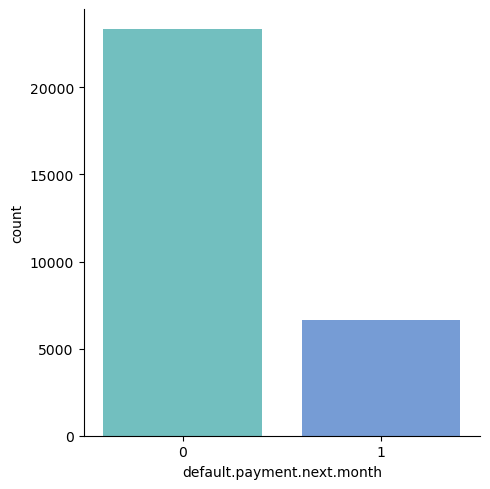

In [16]:
default = df[df["default.payment.next.month"]==0].shape[0]
non_default = df[df["default.payment.next.month"]==1].shape[0]
print(f"defaulters : {default} and non defaulters : {non_default}")
sns.catplot(data=df,x="default.payment.next.month",kind= "count",palette="winter_r",alpha= .6)
plt.show()

### Observations :-
- Here the dataset is imbalanced
- We need to perform resampling 

<Axes: >

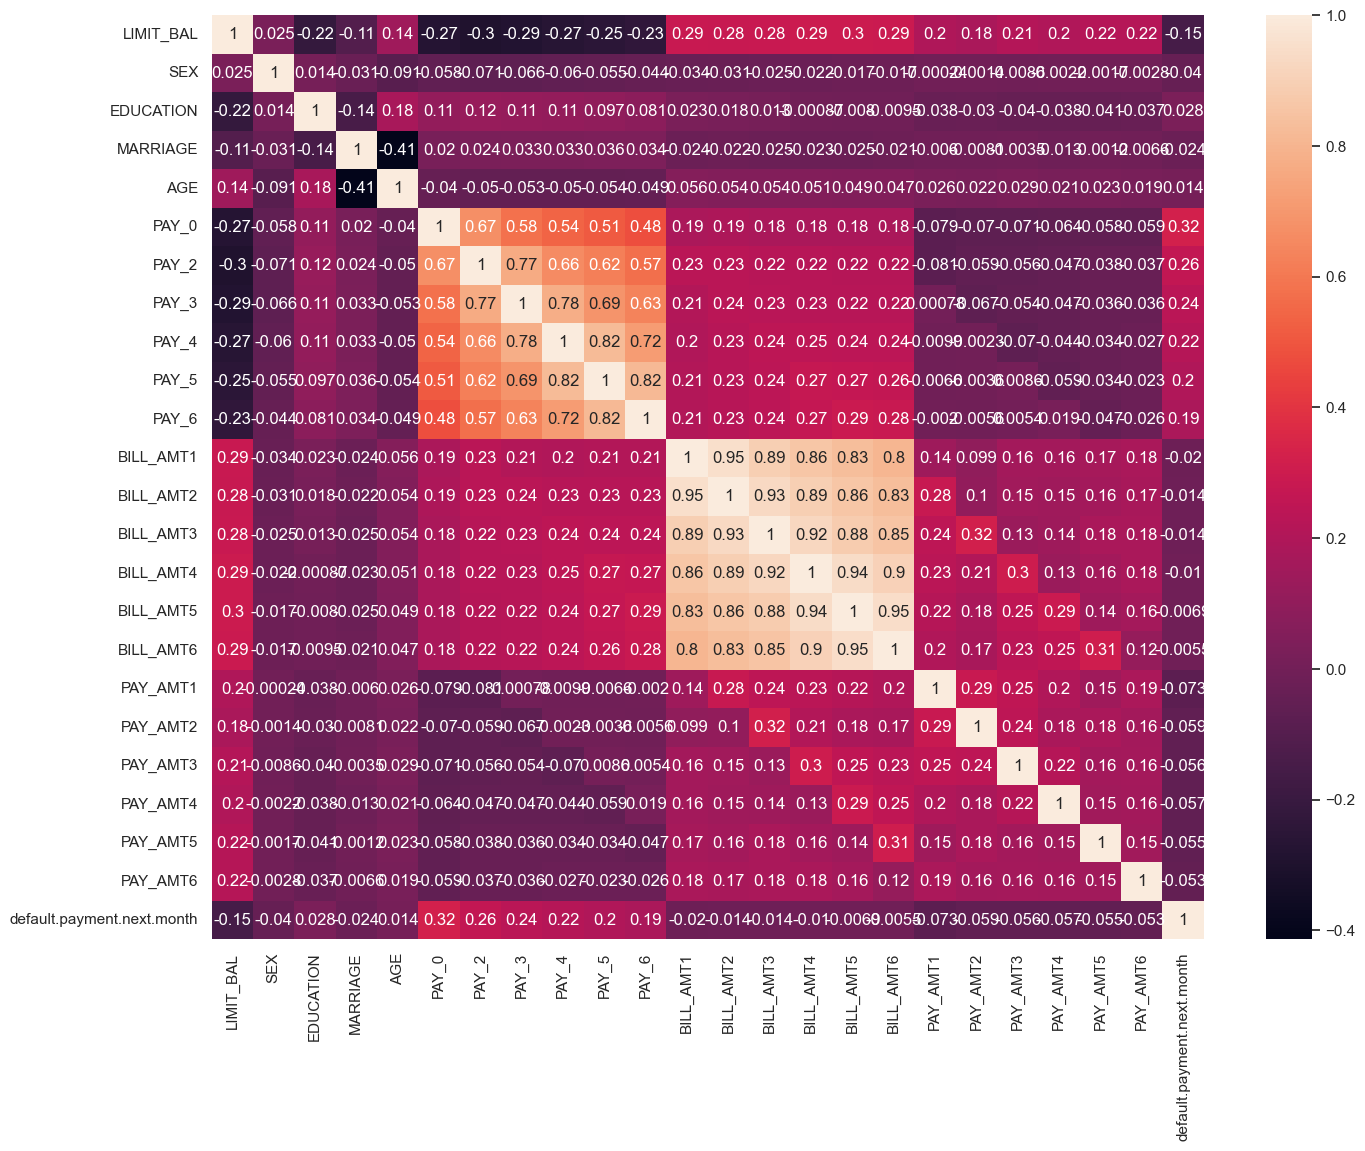

In [17]:
sns.set(rc= {'figure.figsize':(16,12)})
sns.heatmap(df.corr(),annot= True)

## Dealing imbalanced data

In [18]:
# splitting X and y

X = df.drop('default.payment.next.month',axis = 1)
y = df["default.payment.next.month"]

In [19]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [20]:
y_res.value_counts()

1    22688
0    22688
Name: default.payment.next.month, dtype: int64

### Functions for model training and evaluation

In [27]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [28]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    models_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    train_precision_list = []
    test_precision_list = []
    train_recall_list = []
    test_recall_list = []
    train_f1_score = []
    test_f1_score = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        train_accuracy_list.append(model_train_accuracy)
        test_accuracy_list.append(model_test_accuracy)
        train_precision_list.append(model_train_precision)
        test_precision_list.append(model_test_precision)
        train_recall_list.append(model_train_recall)
        test_recall_list.append(model_test_recall)
        train_f1_score.append(model_train_f1)
        test_f1_score.append(model_test_f1)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, train_accuracy_list,test_accuracy_list,train_precision_list,test_precision_list,train_recall_list,test_recall_list,train_f1_score,test_f1_score)), columns=['Model Name', 'Train Accuracy',"Test Accuracy","Train Precision","Test Precision","Train Recall","Test Recall","Train f1_score","Test f1_score"]).sort_values(by=["Train f1_score"])

    return report

In [29]:
# Initializing different models in a dictionary

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [30]:
report = evaluate_models(X_res,y_res,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9991
- Recall: 0.9995
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.8473
- F1 score: 0.8437
- Precision: 0.8573
- Recall: 0.8306
- Roc Auc Score: 0.8472


Decision Tree
Model performance for Training set
- Accuracy: 0.9993
- F1 score: 0.9993
- Precision: 0.9996
- Recall: 0.9990
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.7606
- F1 score: 0.7632
- Precision: 0.7496
- Recall: 0.7774
- Roc Auc Score: 0.7607


Gradient Boosting
Model performance for Training set
- Accuracy: 0.7904
- F1 score: 0.7834
- Precision: 0.8120
- Recall: 0.7568
- Roc Auc Score: 0.7905
----------------------------------
Model performance for Test set
- Accuracy: 0.7823
- F1 score: 0.7726
- Precision: 0.8022
- Recall: 0.7452
- Roc Auc Score: 0.7820


Logistic Regression
Model performance for Training 

## Hyperparameter Tuning

In [26]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [28]:
rfc = RandomForestClassifier()

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
gsv = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=1)

In [1]:
gsv.fit(X_train,y_train)

In [21]:
rfc = RandomForestClassifier(max_depth= 20,min_samples_leaf=1,min_samples_split=5,n_estimators= 100)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5)

In [24]:
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

In [26]:
from sklearn.metrics import f1_score,precision_score,recall_score
print("Testing perfomance metrics ")
print(f"f1_score :{f1_score(y_test,y_test_pred)}")
print(f"precision_score :{precision_score(y_test,y_test_pred)}")
print(f"recall_score :{recall_score(y_test,y_test_pred)}")
print(f"accuracy_score : {accuracy_score(y_test,y_test_pred)}")

Testing perfomance metrics 
f1_score :0.45372193777077585
precision_score :0.676056338028169
recall_score :0.34143449911084767
accuracy_score : 0.8148691938067272


In [28]:

print("Training perfomance metrics")
print(f"f1_score :{f1_score(y_train,y_train_pred)}")
print(f"precision_score :{precision_score(y_train,y_train_pred)}")
print(f"recall_score :{recall_score(y_train,y_train_pred)}")
print(f"accuracy_score : {accuracy_score(y_train,y_train_pred)}")

Training perfomance metrics
f1_score :0.8105852902610561
precision_score :0.9866511897852582
recall_score :0.6878413918672871
accuracy_score : 0.9292929292929293


## Cross validation

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

k_folds = 10
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

scores = cross_val_score(model, X_res, y_res, cv=kfold, scoring='accuracy')

# Print the average accuracy across all folds
print(f'Average Accuracy: {scores.mean()}')


Average Accuracy: 0.8526974866950191
